In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/FBLA_Data_Analysis')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/FBLA_Electric_Vehicles_Towing_Weight.csv', header = None)

In [5]:
data

,0,1
0,Kia EV9 99.8 kWh AWD,2500
1,BMW iX M60,2500
2,BMW iX xDrive40,2500
3,BMW iX xDrive50,2500
4,Kia EV9 99.8 kWh AWD GT-Line,2500
...,...,...
326,BYD ATTO 3,0
327,BYD HAN,0
328,Smart #1 Pro,0
329,Fiat 500e Cabrio 42 kWh,0


In [6]:
data.columns = ['car', 'weight']

In [7]:
data['weight'] = round(data['weight'] * 2.205).astype(int)

In [8]:
data

,car,weight
0,Kia EV9 99.8 kWh AWD,5512
1,BMW iX M60,5512
2,BMW iX xDrive40,5512
3,BMW iX xDrive50,5512
4,Kia EV9 99.8 kWh AWD GT-Line,5512
...,...,...
326,BYD ATTO 3,0
327,BYD HAN,0
328,Smart #1 Pro,0
329,Fiat 500e Cabrio 42 kWh,0


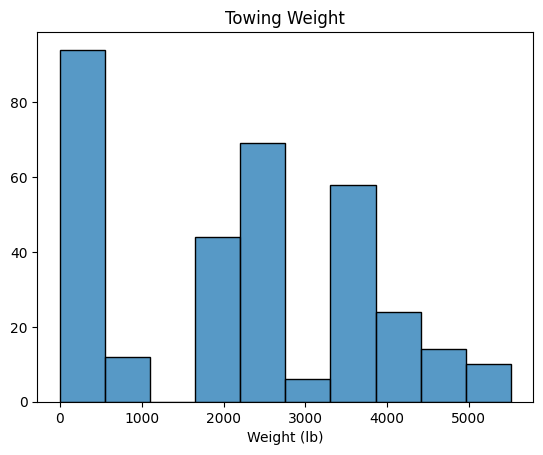

In [9]:
sns.histplot(x = data['weight'])
plt.xlabel('Weight (lb)')
plt.ylabel('')
plt.title('Towing Weight')

plt.show()

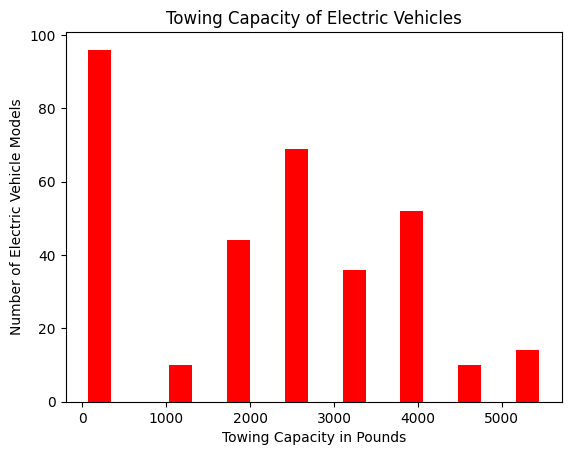

In [10]:
optimal_d = data['weight'][data['weight'] <= 1000]
sub_optimal_d = data['weight'][data['weight'] > 1000]#[data['weight'] < 3000]
# non_optimal_d = data['weight'][data['weight'] > 3000]

plt.hist([optimal_d, sub_optimal_d], color=['red', 'red'], bins = 8)
plt.xlabel('Towing Capacity in Pounds')
plt.ylabel('Number of Electric Vehicle Models')
plt.title('Towing Capacity of Electric Vehicles')

plt.show()

In [11]:
data['weight']

0      5512
1      5512
2      5512
3      5512
4      5512
       ... 
326       0
327       0
328       0
329       0
330       0
Name: weight, Length: 331, dtype: int64

In [12]:
data['weight'].value_counts().sort_index()

0       94
662      2
1102    10
1654    42
1984     2
2205    47
2403     1
2426     2
2646    19
3087     6
3308    30
3528    26
3748     2
3969    21
4013     3
4410    10
4851     4
4961     5
5512     5
Name: weight, dtype: int64

In [13]:
sorted(data['weight'].unique())

[0,
 662,
 1102,
 1654,
 1984,
 2205,
 2403,
 2426,
 2646,
 3087,
 3308,
 3528,
 3748,
 3969,
 4013,
 4410,
 4851,
 4961,
 5512]

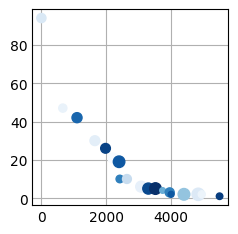

In [14]:
plt.style.use('_mpl-gallery')

x = sorted(data['weight'].unique())
y = data['weight'].value_counts()

sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors)

plt.show()

<ipython-input-15-7028c029e9dc>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(x, y, c=colors, cmap=mcolors.ListedColormap(colors), norm=norm, zorder=2)


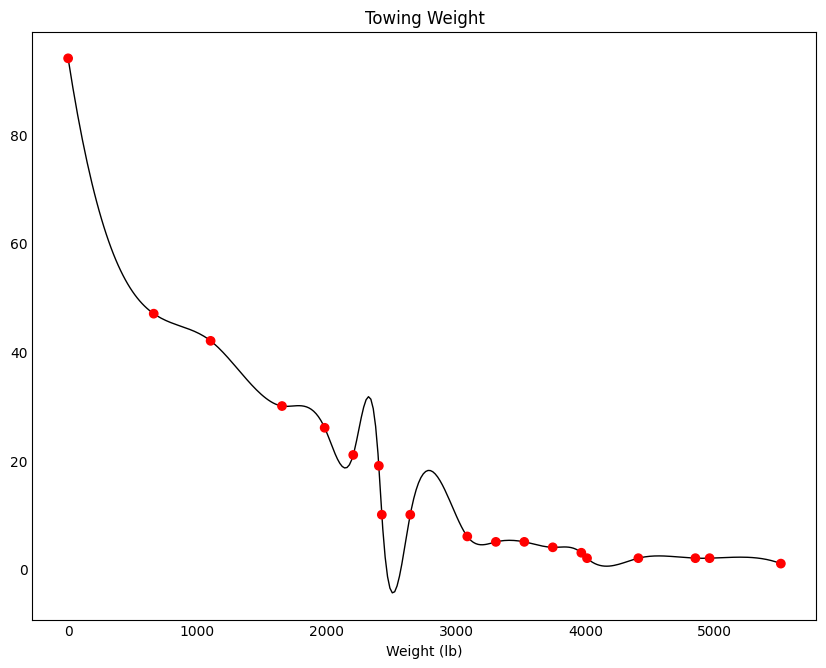

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.colors as mcolors

plt.style.use('_mpl-gallery')

# Assuming 'data' is a pandas DataFrame with a 'weight' column
x = sorted(data['weight'].unique())
y = data['weight'].value_counts()

# Create a custom colormap with a single color (red)
colors = np.full((len(x), 4), [1.0, 0.0, 0.0, 1.0])  # RGBA values for red

# Normalize x values to map them to the colormap range
norm = mcolors.Normalize(vmin=min(x), vmax=max(x))

# Adjust the figsize to control the window size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a cubic spline interpolation
spl = make_interp_spline(x, y)

# Interpolate more points for a smoother curve
x_smooth = np.linspace(min(x), max(x), 300)
y_smooth = spl(x_smooth)

# Plot the interpolated curve
ax.plot(x_smooth, y_smooth, color='black', linestyle='-', linewidth=1, zorder=1)

# Use the cmap and norm parameters to apply the custom colormap for scatter plot
scatter = ax.scatter(x, y, c=colors, cmap=mcolors.ListedColormap(colors), norm=norm, zorder=2)

# Remove gridlines
ax.grid(False)

plt.xlabel('Weight (lb)')
plt.title('Towing Weight')

plt.show()

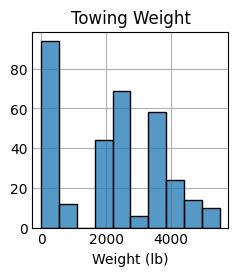

In [16]:
data['weight']

sns.histplot(x = data['weight'])
plt.xlabel('Weight (lb)')
plt.ylabel('')
plt.title('Towing Weight')

plt.show()

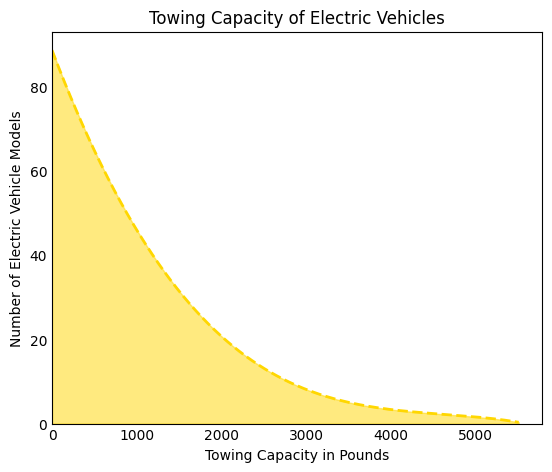

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_curve_fit(x, y, degree=3, num_points=300, color='gold', fill_color='gold', figsize=(5, 4)):
    fig, ax = plt.subplots(figsize=figsize)

    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    x_smooth = np.linspace(min(x), max(x), num_points)
    y_smooth = poly(x_smooth)

    ax.fill_between(x_smooth, y_smooth, color=fill_color, alpha=0.5)

    ax.plot(x_smooth, y_smooth, color=color, linestyle='--', linewidth=2)

    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(False)
    ax.set_ylim(0)
    ax.set_xlim(0)
    plt.xlabel('Towing Capacity in Pounds')
    plt.ylabel('Number of Electric Vehicle Models')
    plt.title('Towing Capacity of Electric Vehicles')

    plt.show()

plot_curve_fit(x, y, degree=3)